# **Python_Concurrency**
## **What’s are the Differences between Processes and Threads?**
  * Introduction to processes and threads
  * Suppose that you have a simple Python program:

In [ ]:
x = 10
y = 20
z = x + y

* Computers don’t understand Python. They only understand machine code, which is a set of instructions containing zero and one.

* Therefore, you need a Python interpreter to execute this Python program that translates the Python code to machine code.

* When you execute the python app.py command, Python interpreter (CPython) compiles the app.py into machine code.

* The operating system (OS) needs to load the program into the memory (RAM) to run the program.

* Once the OS loads the program to memory, it moves the instructions to the CPU for execution via bus.

* In general, the OS moves the instructions to a queue, also known as a pipeline. Then, the CPU will execute the instructions from the pipeline.

* By definition, a process is an instance of a program running on a computer. And a thread is a unit of execution within a process.

* Notice that if you launch a program multiple times, you’ll have one program but multiple processes which are instances of the program.

* The following picture illustrates the flow of running a Python program on a computer:
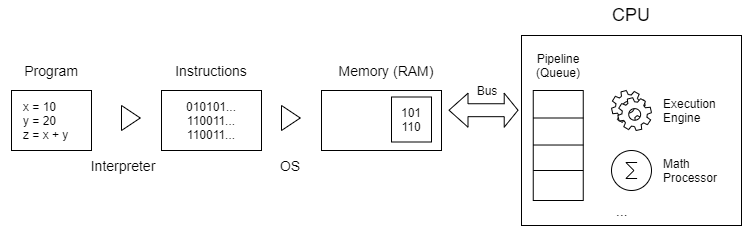

* So far, you’ve learned how to develop a program that has one process with one thread. Therefore, the terms process and thread are often used interchangeably sometimes.

* A program may have one or more processes and a process can have one or more threads.

* When a program has multiple processes, it’s called multiprocessing. If a program has multiple threads, it’s called multithreading.

## **Single-core processors**
* In the past, a CPU has only one core. In other words, it can run only a single process at one time. 
* To execute multiple processes “at the same time”, the OS uses a software component called scheduler:
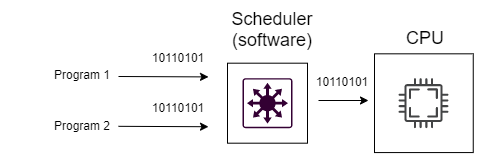

* The scheduler is like a switch that handles process scheduling. The main task of the scheduler is to select the instructions and submit them for execution regularly.

* The scheduler switches between processes so fast (about 1ms) that you feel the computer can run multiple processes simultaneously.

### **Multicore processors**
* Today, the CPU often has multiple cores, e.g., two cores (dual-core) and four cores (quad-core).

* The number of cores will determine the number of processes that the CPU can execute simultaneously. Generally, the more cores the CPU has, the more processes it can truly execute simultaneously.

* For example, a dual-core CPU can execute exactly two processes simultaneously and a quad-core CPU can execute at most four processes simultaneously.

* Multiprocessing uses a multi-core CPU within a single computer, which indeed executes multiple processes in parallel.

### **CPU-bound vs. I/O bound tasks**
* In general, programs handle two types of tasks: I/O-bound or CPU-bound.

* An I/O-bound process spends more time doing I/O than doing computations. The typical examples of I/O bound processes are network requests, database connections, and file I/O.
* In contrast, a CPU-bound process uses more time doing computation than generating I/O requests. The typical examples of CPU-bound processes are matrix multiplication, finding prime numbers, video compression, and video streaming.
Technically, multithreading is suitable for I/O bound processes, and multiprocessing is suitable for CPU-bound processes.

### **The main differences between a process and a thread**
* The following table illustrates the main differences between a process and a thread:
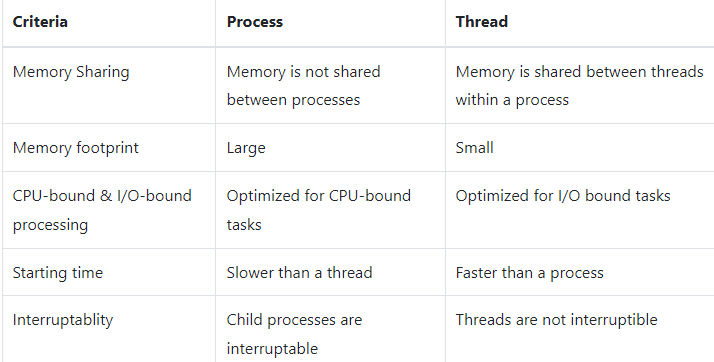

## **Python Threading**
### **Single-threaded applications**
* Let’s start with a simple program:

In [ ]:
from time import sleep, perf_counter

def task():
    print('Starting a task...')
    sleep(1)
    print('done')


start_time = perf_counter()

task()
task()

end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')


Starting a task...
done
Starting a task...
done
It took  2.01 second(s) to complete.


* As you may expect, the program takes about two seconds to complete. If you call the task() function 10 times, it would take about 10 seconds to complete.

* The following diagram illustrates how the program works:
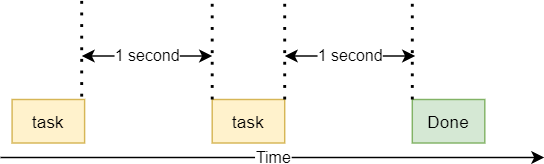

* First, the task() function executes and sleeps for one second. Then it executes the second time and also sleeps for another second. Finally, the program completes.

* When the task() function called the sleep() function, the CPU is idle. In other words, the CPU doesn’t do anything, which is not efficient in terms of resource utilization.

* This program has one process with a single thread, which is called the main thread. Because the program has only one thread, it’s called the single-threaded program.

### **Using Python threading to develop a multi-threaded program example**

In [ ]:
from time import sleep, perf_counter
#First, import the Thread class from the threading module:
from threading import Thread


def task():
    print('Starting a task...')
    sleep(1)
    print('done')


start_time = perf_counter()
#Second, create a new thread by instantiating an instance of the Thread class:
# create two new threads
t1 = Thread(target=task)
t2 = Thread(target=task)

# start the threads
t1.start()
t2.start()
#If you want to wait for the thread to complete in the main thread, you can call the join() method:
#By calling the join() method, the main thread will wait for the second thread to complete before it is terminated.
# wait for the threads to complete
t1.join()
t2.join()

end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

Starting a task...
Starting a task...
done
done
It took  1.00 second(s) to complete.


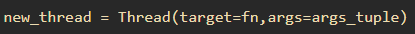
* The **Thread()** accepts many parameters. The main ones are:

  * **target:** specifies a function (fn) to run in the new thread.
  * **args:** specifies the arguments of the function (fn). The args argument is a tuple.


* How it works. (and we’ll focus on the threading part only)

  * First, create two new threads:
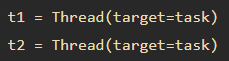
  * Second, start both threads by calling the start() method:
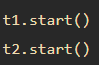

  * Third, wait for both threads to complete:
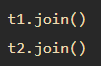

  * Finally, show the executing time:
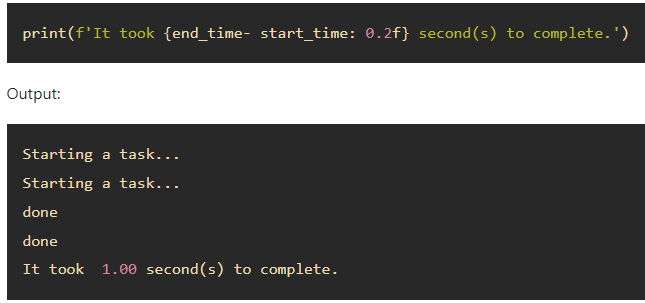

* When the program executes, it’ll have three threads: the main thread is created by the Python interpreter, and two threads are created by the program.

* As shown clearly from the output, the program took one second instead of two to complete.

* The following diagram shows how threads execute:
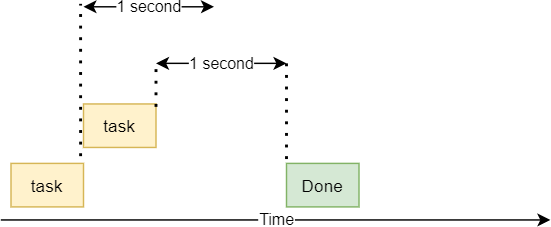

### **Passing arguments to threads**
* The following program shows how to pass arguments to the function assigned to a thread:


In [ ]:
from time import sleep, perf_counter
from threading import Thread


def task(id):
    print(f'Starting the task {id}...')
    sleep(1)
    print(f'The task {id} completed')


start_time = perf_counter()

# create and start 10 threads
threads = []
for n in range(1, 11):
    t = Thread(target=task, args=(n,))
    threads.append(t)
    t.start()

# wait for the threads to complete
for t in threads:
    t.join()

end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')

Starting the task 1...Starting the task 2...
Starting the task 3...

Starting the task 4...
Starting the task 5...
Starting the task 6...
Starting the task 7...
Starting the task 8...
Starting the task 9...
Starting the task 10...
The task 1 completed
The task 3 completed
The task 2 completed
The task 4 completed
The task 6 completed
The task 5 completedThe task 7 completed
The task 8 completed

The task 9 completed
The task 10 completed
It took  1.02 second(s) to complete.


### **How it works.**

  * First, define a task() function that accepts an argument:
  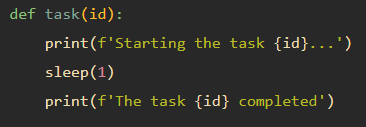
  * Second, create 10 new threads and pass an id to each. The threads list is used to keep track of all newly created threads:
  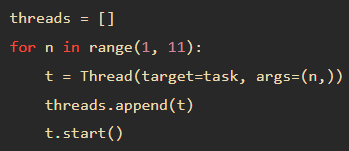
  * Notice that if you call the join() method inside the loop, the program will wait for the first thread to complete before starting the next one.

  * Third, wait for all threads to complete by calling the join() method:<br />
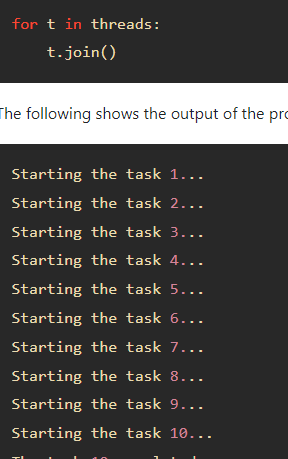

* It just took 1.05 seconds to complete.

* Notice that the program doesn’t execute the thread in the order from 1 to 10.

### **When to use Python threading?**
* As introduced in the process and thread tutorial, there’re two main tasks:

  * **I/O-bound tasks** – the time spent on I/O is significantly more than the time spent on computation
  * **CPU-bound tasks** – the time spent on computation is significantly higher than the time waiting for I/O.
  * Python threading is optimized for I/O bound tasks. For example, requesting remote resources, connecting a database server, or reading and writing files.

* A Practical Python threading example
  * Suppose that you have a list of text files in a folder e.g., C:/temp/. And you want to replace a text with a new one in all the files.

* The following single-threaded program shows how to replace a substring with the new one in the text files:



In [ ]:
from time import perf_counter


def replace(filename, substr, new_substr):
    print(f'Processing the file {filename}')
    # get the contents of the file
    with open(filename, 'r') as f:
        content = f.read()

    # replace the substr by new_substr
    content = content.replace(substr, new_substr)

    # write data into the file
    with open(filename, 'w') as f:
        f.write(content)


def main():
    filenames = [
        'c:/temp/test1.txt',
        'c:/temp/test2.txt',
        'c:/temp/test3.txt',
        'c:/temp/test4.txt',
        'c:/temp/test5.txt',
        'c:/temp/test6.txt',
        'c:/temp/test7.txt',
        'c:/temp/test8.txt',
        'c:/temp/test9.txt',
        'c:/temp/test10.txt',
    ]

    for filename in filenames:
        replace(filename, 'ids', 'id')


if __name__ == "__main__":
    start_time = perf_counter()

    main()

    end_time = perf_counter()
    print(f'It took {end_time- start_time :0.2f} second(s) to complete.')


Processing the file c:/temp/test1.txt


FileNotFoundError: ignored

* The following program has the same functionality. However, it uses multiple threads instead:

In [ ]:
from threading import Thread
from time import perf_counter


def replace(filename, substr, new_substr):
    print(f'Processing the file {filename}')
    # get the contents of the file
    with open(filename, 'r') as f:
        content = f.read()

    # replace the substr by new_substr
    content = content.replace(substr, new_substr)

    # write data into the file
    with open(filename, 'w') as f:
        f.write(content)


def main():
    filenames = [
        'c:/temp/test1.txt',
        'c:/temp/test2.txt',
        'c:/temp/test3.txt',
        'c:/temp/test4.txt',
        'c:/temp/test5.txt',
        'c:/temp/test6.txt',
        'c:/temp/test7.txt',
        'c:/temp/test8.txt',
        'c:/temp/test9.txt',
        'c:/temp/test10.txt',
    ]

    # create threads
    threads = [Thread(target=replace, args=(filename, 'id', 'ids'))
            for filename in filenames]

    # start the threads
    for thread in threads:
        thread.start()

    # wait for the threads to complete
    for thread in threads:
        thread.join()


if __name__ == "__main__":
    start_time = perf_counter()

    main()

    end_time = perf_counter()
    print(f'It took {end_time- start_time :0.2f} second(s) to complete.')


Processing the file c:/temp/test1.txt
Processing the file c:/temp/test2.txt
Processing the file c:/temp/test3.txt
Processing the file c:/temp/test4.txtProcessing the file c:/temp/test5.txt

Processing the file c:/temp/test6.txt
Processing the file c:/temp/test7.txt
Processing the file c:/temp/test8.txt
Processing the file c:/temp/test9.txt
Processing the file c:/temp/test10.txt
It took 0.02 second(s) to complete.


Exception in thread Thread-27:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-6-50d1f1c44713>", line 8, in replace
    with open(filename, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'c:/temp/test5.txt'

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-6-50d1f1c44713>", line 8, in replace
    with open(filename, 'r') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'c:/temp/test1.txt'

Exception in thread Thread-25:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
  

* As you can see clearly from the output, the multi-thread program runs so much faster.

## **Python ThreadPoolExecutor**
### **Introduction to the Python ThreadPoolExecutor class**
* In the multithreading tutorial, you learned how to manage multiple threads in a program using the Thread class of the threading module. The Thread class is useful when you want to create threads manually.

* However, manually managing threads is not efficient because creating and destroying many threads frequently are very expensive in terms of computational costs.

* Instead of doing so, you may want to reuse the threads if you expect to run many ad-hoc tasks in the program. A thread pool allows you to achieve this.

#### **Thread pool**
* A thread pool is a pattern for achieving concurrency of execution in a program. A thread pool allows you to automatically manage a pool of threads efficiently:<br />
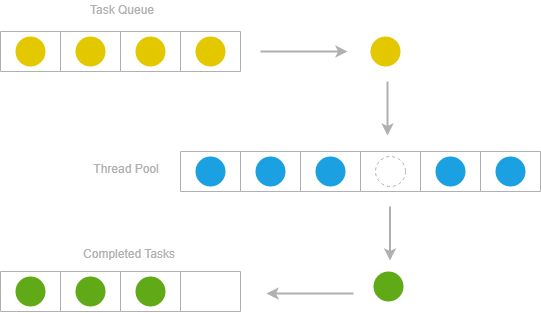

* Each thread in the pool is called a worker thread or a worker. A thread pool allows you to reuse the worker threads once the tasks are completed. It also protects against unexpected failures such as exceptions.

* Typically, a thread pool allows you to configure the number of worker threads and provides a specific naming convention for each worker thread.

* To create a thread pool, you use the ThreadPoolExecutor class from the concurrent.futures module.

##### **ThreadPoolExecutor**
* The ThreadPoolExecutor class extends the Executor class and returns a Future object.

##### **Executor**
* The Executor class has three methods to control the thread pool:

  * submit() – dispatch a function to be executed and return a Future object.The submit() method takes a function and executes it asynchronously.
  * map() – execute a function asynchronously for each element in an iterable.
  * shutdown() – shut down the executor.
* When you create a new instance of the ThreadPoolExecutor class, Python starts the Executor.

* Once completing working with the executor, you must explicitly call the shutdown() method to release the resource held by the executor. To avoid calling the shutdown() method explicitly, you can use the context manager.

#### **Future object**
* A Future is an object that represents the eventual result of an asynchronous operation. The Future class has two useful methods:

  * result() – return the result of an asynchronous operation.
  * exception() – return the exception of an asynchronous operation in case an exception occurs.

#### **Python ThreadPoolExecutor examples**
* The following program uses a single thread:


In [ ]:
from time import sleep, perf_counter

def task(id):
    print(f'Starting the task {id}...')
    sleep(1)
    return f'Done with task {id}'

start = perf_counter()

print(task(1))
print(task(2))

finish = perf_counter()

print(f"It took {finish-start} second(s) to finish.")

Starting the task 1...
Done with task 1
Starting the task 2...
Done with task 2
It took 2.0030190319998837 second(s) to finish.


#### **How it works.**

  * First, define the task() function that takes about one second to finish. The task() function calls the sleep() function to simulate a delay:
  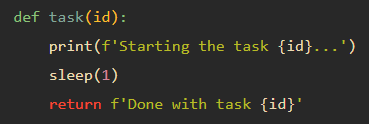
  * Second, call the task() function twice and print out the result. Before and after calling the task() function, we use the perf_counter() to measure the start and finish time:
  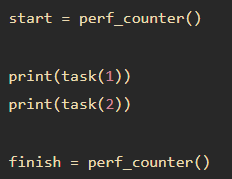
  * Third, print out the time the program took to run:
  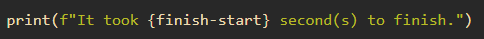
  * Because the task() function takes one second, calling it twice will take about 2 seconds.

#### **Using the submit() method example**
* To run the task() function concurrently, you can use the ThreadPoolExecutor class:


In [ ]:
from time import sleep, perf_counter
from concurrent.futures import ThreadPoolExecutor

def task(id):
    print(f'Starting the task {id}...')
    sleep(1)
    return f'Done with task {id}'

start = perf_counter()

with ThreadPoolExecutor() as executor:
    f1 = executor.submit(task, 1)
    f2 = executor.submit(task, 2)

    print(f1.result())
    print(f2.result())    

finish = perf_counter()

print(f"It took {finish-start} second(s) to finish.")

Starting the task 1...
Starting the task 2...
Done with task 1
Done with task 2
It took 1.0102932390000205 second(s) to finish.


* The output shows that the program took about 1 second to finish.

* How it works (we’ll focus on the thread pool part):

* First, import the ThreadPoolExecutor class from the concurrent.futures module:
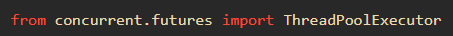

* Second, create a thread pool using the ThreadPoolExecutor using a context manager:
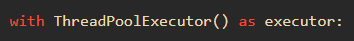
  * Third, calling the task() function twice by passing it to the submit() method of the executor:
  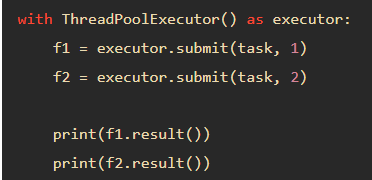
* The submit() method returns a Future object. In this example, we have two Future objects f1 and f2. To get the result from the Future object, we called its result() method.